# A Linear Regression Model Notebook for the Wallaroo Platform
#### A Comprehensive Tutorial for:
1. Building a Linear Regression Model
2. Deploying the Model into Wallaroo
3. Using Wallaroo's Monitering Capabilities to Analyze the Model.

# Building a Linear Regression Model

> This model will be built from a data set of sensor values and the occupancy of the room the sensors are in.
> The goal is to use the sensor data to predict the room occupancy.

### Importing the Necessary Python Libraries

We will use a variety of libraries to implement the linear regression model

These libraries include:
- matplotlib
- numpy
- sklearn
- pandas
- onnx

In [45]:
# Code Source: Us

#needed for data visualization
import matplotlib.pyplot as plt

#needed for data tuning
import numpy as np

#needed for creating the linear regression model
from sklearn import linear_model

#needed for metrics of the model
from sklearn.metrics import mean_squared_error, r2_score

#needed for csv importing
import pandas as pd

### Importing the Data Set using Pandas

In [46]:
data = pd.read_csv('Occupancy_Estimation.csv')
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [47]:
data.corr()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
S1_Temp,1.000000,0.799707,0.948839,0.855279,0.680743,0.548735,0.645163,0.212217,0.436099,0.391137,0.438769,0.355826,0.866718,0.137391,0.436363,0.474077,0.700868
S2_Temp,0.799707,1.000000,0.765525,0.696581,0.639773,0.645987,0.607349,0.370897,0.438274,0.409545,0.427133,0.378724,0.743722,0.202547,0.476901,0.465884,0.671263
S3_Temp,0.948839,0.765525,1.000000,0.885186,0.594311,0.500054,0.642601,0.301419,0.375183,0.344026,0.398177,0.326182,0.821308,0.095842,0.403355,0.460309,0.652047
S4_Temp,0.855279,0.696581,0.885186,1.000000,0.581482,0.456350,0.588459,0.386871,0.355111,0.312594,0.340808,0.294939,0.650320,0.106208,0.340000,0.339037,0.526509
S1_Light,0.680743,0.639773,0.594311,0.581482,1.000000,0.842090,0.816438,0.510853,0.601166,0.534274,0.494080,0.441712,0.602740,0.498185,0.607159,0.545213,0.849058
S2_Light,0.548735,0.645987,0.500054,0.456350,0.842090,1.000000,0.709579,0.458914,0.503021,0.560630,0.439269,0.413932,0.566764,0.493281,0.554658,0.556797,0.788764
S3_Light,0.645163,0.607349,0.642601,0.588459,0.816438,0.709579,1.000000,0.579484,0.502606,0.434859,0.577151,0.473606,0.650829,0.447708,0.501836,0.577815,0.793081
S4_Light,0.212217,0.370897,0.301419,0.386871,0.510853,0.458914,0.579484,1.000000,0.293632,0.303949,0.169702,0.200793,0.148608,0.212718,0.324545,0.220196,0.355715
S1_Sound,0.436099,0.438274,0.375183,0.355111,0.601166,0.503021,0.502606,0.293632,1.000000,0.560062,0.540736,0.557733,0.391903,0.335772,0.522015,0.463040,0.573748
S2_Sound,0.391137,0.409545,0.344026,0.312594,0.534274,0.560630,0.434859,0.303949,0.560062,1.000000,0.529830,0.578635,0.333836,0.357235,0.485697,0.507231,0.557853


### Pulling our Independent (x) and Dependent (y) Variables from the DataFrame

In [48]:
# matrix of features x
x = data[['S1_Light']].values

# array of independent variable y
y = data['Room_Occupancy_Count'].values

In [49]:
print(x)

[[121]
 [121]
 [121]
 ...
 [  6]
 [  6]
 [  6]]


In [50]:
print(y)

[1 1 1 ... 0 0 0]


### Splitting the Data Set into Testing and Training Subsets

In [51]:
from sklearn.model_selection import train_test_split

# create test and train datasets with 0.2 (20%) of the dataset being test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

### Creating the Linear Regression Model using Sklearn and Fitting our Training Data to the Model

In [52]:
from sklearn.linear_model import LinearRegression

# creating the linear regression object
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

### Predicting the Room Occupancy from our Independent Variable Test Set

In [53]:
y_pred = regr.predict(x_test)
rows = y_pred.shape[0]
predictions = y_pred.reshape((rows, ))
y_pred

array([0.12055646, 0.0165267 , 0.0165267 , ..., 0.0165267 , 0.0165267 ,
       0.0165267 ])

### Finding the Metrics to Analyze the Prediction

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.01486139]
Root mean squared error: 0.50
Coefficient of determination: 0.70


In [107]:
def actual_postprocess(predictions):
    # turn the results of predictions into a vector
    # sklearn predictions are already a vector, so this is idempotent
    rows = predictions.shape[0]
    predictions = predictions.reshape((rows, ))
    for i in range(len(predictions)):
        predictions[i] = round(predictions[i])
    return predictions

In [108]:
# y_pred = actual_postprocess(y_pred)
# y_pred

array([0., 0., 0., ..., 0., 0., 0.])

### Plotting the Linear Regression

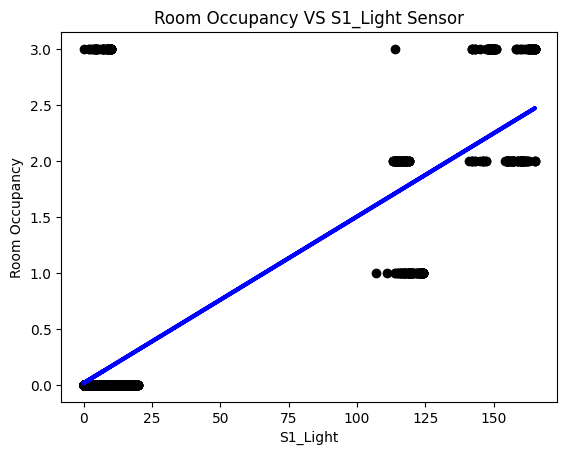

In [58]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)

plt.xlabel('S1_Light')
plt.ylabel('Room Occupancy')
plt.title('Room Occupancy VS S1_Light Sensor')
plt.show()

### Converting the Sklearn Model into Onnx for use on the Wallaroo Platform

In [59]:
# Used to load the sk-learn model
import pickle

# Used for the conversion process
import onnx, skl2onnx, onnxmltools
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx.common.data_types import DoubleTensorType

In [60]:
def model_to_onnx(model, cols, *, input_type='Double'):
    input_type_lower=input_type.lower()
    # How to manage float values
    if input_type=='Double':
        tensor_type=DoubleTensorType
    elif input_type=='Float':
        tensor_type=FloatTensorType
    else:
        raise ValueError("bad input type")
    tensor_size=cols
    initial_type=[(f'{input_type_lower}_input', tensor_type([None, tensor_size]))]
    onnx_model=onnxmltools.convert_sklearn(model,initial_types=initial_type)
    return onnx_model

In [61]:
pickle.dump(regr, open('occupancy_model.pickle', 'wb'))

In [62]:
sklearn_model = pickle.load(open('occupancy_model.pickle', 'rb'))

In [63]:
onnx_model_converted = model_to_onnx(sklearn_model, 1)

In [64]:
onnx.save_model(onnx_model_converted, "occupancy_model.onnx")

In [65]:
import wallaroo

In [66]:
wl = wallaroo.Client()

In [67]:
workspace_name = 'mnsuproject'
pipeline_name = 'occupancypipeline'
model_name = 'occupancymodel'
model_file_name = 'occupancy_model.onnx'

In [68]:
def get_workspace(name):
    wl = wallaroo.Client()
    workspace = None
    for ws in wl.list_workspaces():
        if ws.name() == name:
            workspace= ws
    if(workspace == None):
        workspace = wl.create_workspace(name)
    return workspace

def get_pipeline(name):
    wl = wallaroo.Client()
    try:
        pipeline = wl.pipelines_by_name(pipeline_name)[0]
    except EntityNotFoundError:
        pipeline = wl.build_pipeline(pipeline_name)
    return pipeline

In [69]:
workspace = get_workspace(workspace_name)

wl.set_current_workspace(workspace)

{'name': 'mnsuproject', 'id': 13, 'archived': False, 'created_by': '5e5c838e-b6db-4c1c-935d-64e91be15b8e', 'created_at': '2022-09-21T20:20:36.547755+00:00', 'models': [{'name': 'occupancymodel', 'version': '45904398-7ce1-4cfe-b01f-91524c8ecba8', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 21, 20, 20, 37, 517983, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '303d4175-44ce-4939-a50d-ebccf53e3e36', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 28, 15, 19, 26, 509665, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '14d781b4-8f09-43be-835e-6cae3cfe16e9', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 28, 15, 26, 39, 900902, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '75687b2b-6246-4565-933c-f57ec9e832d0', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datet

In [70]:
wl.list_workspaces()

Name,Created At,Users,Models,Pipelines
v-dylan.moore@wallaroo.ai - Default Workspace,2022-09-02 21:39:41,"['v-dylan.moore@wallaroo.ai', 'v-samuel.baeyen@wallaroo.ai', 'v-joseph.bigger@wallaroo.ai', 'v-jit.bhakta@wallaroo.ai', 'v-nathaniel.bursch@wallaroo.ai']",1,0
testautoconversion,2022-09-21 15:04:52,"['v-joseph.bigger@wallaroo.ai', 'v-jit.bhakta@wallaroo.ai', 'v-dylan.moore@wallaroo.ai', 'v-samuel.baeyen@wallaroo.ai', 'v-nathaniel.bursch@wallaroo.ai']",23,3
mnsuproject,2022-09-21 20:20:36,"['v-dylan.moore@wallaroo.ai', 'v-samuel.baeyen@wallaroo.ai', 'v-nathaniel.bursch@wallaroo.ai', 'v-joseph.bigger@wallaroo.ai', 'v-jit.bhakta@wallaroo.ai']",27,1


In [71]:
wl.set_current_workspace(workspace)
wl.get_current_workspace()

{'name': 'mnsuproject', 'id': 13, 'archived': False, 'created_by': '5e5c838e-b6db-4c1c-935d-64e91be15b8e', 'created_at': '2022-09-21T20:20:36.547755+00:00', 'models': [{'name': 'occupancymodel', 'version': '45904398-7ce1-4cfe-b01f-91524c8ecba8', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 21, 20, 20, 37, 517983, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '303d4175-44ce-4939-a50d-ebccf53e3e36', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 28, 15, 19, 26, 509665, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '14d781b4-8f09-43be-835e-6cae3cfe16e9', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datetime.datetime(2022, 9, 28, 15, 26, 39, 900902, tzinfo=tzutc())}, {'name': 'occupancymodel', 'version': '75687b2b-6246-4565-933c-f57ec9e832d0', 'file_name': 'occupancy_model.onnx', 'image_path': None, 'last_update_time': datet

In [72]:
occupancy_model = wl.upload_model(model_name, model_file_name).configure()
module_post = wl.upload_model("postprocess", "./postprocess.py").configure('python')

In [73]:
# wl.list_models()

In [74]:
occupancy_pipeline = wl.build_pipeline(pipeline_name)

In [75]:
occupancy_pipeline.add_model_step(occupancy_model)

name,occupancypipeline
created,2022-09-21 20:20:37.684974+00:00
last_updated,2022-09-28 16:33:13.966898+00:00
deployed,True
tags,
steps,occupancymodel


In [76]:
occupancy_pipeline.add_model_step(module_post)

name,occupancypipeline
created,2022-09-21 20:20:37.684974+00:00
last_updated,2022-09-28 16:33:13.966898+00:00
deployed,True
tags,
steps,occupancymodel


In [77]:
occupancy_pipeline.deploy()

 ok


name,occupancypipeline
created,2022-09-21 20:20:37.684974+00:00
last_updated,2022-09-28 16:33:14.091186+00:00
deployed,True
tags,
steps,occupancymodel


In [78]:
occupancy_pipeline.status()

{'status': 'Running',
 'details': None,
 'engines': [{'ip': '10.244.3.70',
   'name': 'engine-f8d888cc6-zvpgs',
   'status': 'Running',
   'reason': None,
   'pipeline_statuses': {'pipelines': [{'id': 'occupancypipeline',
      'status': 'Running'}]},
   'model_statuses': {'models': [{'name': 'occupancymodel',
      'version': '6ccf400e-418b-483e-93b1-96ed7ca688a1',
      'sha': 'e87e0c9e74945aeb74e483bdb90bbf412f20ec09577dbdc53b5118906e06cb1f',
      'status': 'Running'},
     {'name': 'postprocess',
      'version': '9dac44bd-fb3f-45d7-9358-25a41393be0c',
      'sha': '64e23579ad39649fdcf164acf743611dd808d4dea6ad84f4b8317717cba13230',
      'status': 'Running'}]}}],
 'engine_lbs': [{'ip': '10.244.3.69',
   'name': 'engine-lb-67c854cc86-rgkh4',
   'status': 'Running',
   'reason': None}]}

In [79]:
import json
from wallaroo.object import EntityNotFoundError

In [80]:
def pandas_to_dict(df):
    input_dict = {
    'tensor': df.to_numpy().tolist()
    }
    return input_dict

In [81]:
raw = data.iloc[:10,6:7]
raw

,S1_Light
0,121
1,121
2,121
3,121
4,121
5,121
6,120
7,121
8,122
9,101


In [102]:

input_dict = pandas_to_dict(raw)
# input_dict = {'tensor': x_test.tolist()}
# input_dict = {'tensor': [[121],[12]]}

In [103]:
result = occupancy_pipeline.infer(input_dict)
result

[InferenceResult({'check_failures': [],
  'elapsed': 377202,
  'model_name': 'postprocess',
  'model_version': '9dac44bd-fb3f-45d7-9358-25a41393be0c',
  'original_data': {'tensor': [[121],
                               [121],
                               [121],
                               [121],
                               [121],
                               [121],
                               [120],
                               [121],
                               [122],
                               [101]]},
  'outputs': [{'Json': {'data': [{'original': {'outputs': [{'Double': {'data': [1.8147553252418904,
                                                                                1.8147553252418904,
                                                                                1.8147553252418904,
                                                                                1.8147553252418904,
                                                                   

In [115]:
result[0].data()[0].tolist()

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

In [84]:
# occupancy_pipeline.undeploy()

In [85]:
logs = occupancy_pipeline.logs()

In [86]:
type(logs)

wallaroo.logs.LogEntries

In [87]:
type(logs[0])

wallaroo.logs.LogEntry

In [88]:
vars(logs[0])

{'elapsed': 172102,
 'model_name': 'occupancymodel',
 'model_version': '45904398-7ce1-4cfe-b01f-91524c8ecba8',
 'input': [[121],
  [121],
  [121],
  [121],
  [121],
  [121],
  [120],
  [121],
  [122],
  [101]],
 'output': [array([[1.81815241],
         [1.81815241],
         [1.81815241],
         [1.81815241],
         [1.81815241],
         [1.81815241],
         [1.80329799],
         [1.81815241],
         [1.83300683],
         [1.52106398]])],
 'validation_failures': [],
 'timestamp': datetime.datetime(2022, 9, 21, 20, 25, 20, 715000),
 'raw': {'model_name': 'occupancymodel',
  'model_version': '45904398-7ce1-4cfe-b01f-91524c8ecba8',
  'pipeline_name': 'occupancypipeline',
  'outputs': [{'Double': {'v': 1,
     'dim': [10, 1],
     'data': [1.8181524064645578,
      1.8181524064645578,
      1.8181524064645578,
      1.8181524064645578,
      1.8181524064645578,
      1.8181524064645578,
      1.8032979852974789,
      1.8181524064645578,
      1.833006827631637,
      1.52106398